In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all the packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import opendatasets as od
%matplotlib inline

import os

os.chdir("/content/drive/MyDrive/Data Science/Materiale Corso/Workshop/2° workshop/W2")


The provided code is importing three datasets using pandas library and printing the first few rows of each dataset.

In [3]:
# Importing the police shootings dataset
police_shootings_url = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv"
police_shootings = pd.read_csv(police_shootings_url, encoding='cp1252')

# Importing the population dataset
population_url = "https://drive.google.com/uc?id=1kEikaWCZYVO3ygVvAuVqxYqQPaVJrdYb"
population = pd.read_csv(population_url)

kaggle_share_race = pd.read_csv("/content/drive/MyDrive/Data Science/Materiale Corso/Workshop/2° workshop/W2/kaggl/ShareRaceByCity.csv")

# Printing the first few rows of the datasets
police_shootings.head()

population.head()

kaggle_share_race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


This code imports three datasets: police_shootings, population, and kaggle_share_race, and prints the first few rows of each dataset using the head() method.

Then, the code merges the police_shootings and population datasets into a new dataframe called merged_df using the merge() method from the Pandas library. The merge is performed using the city and state columns as the join keys. The how='left' parameter specifies that all records from the police_shootings dataset should be included in the merged dataframe, even if there is no matching record in the population dataset. The resulting dataframe merged_df contains all columns from both datasets, and any missing values are filled with NaN.

Finally, the code prints the columns of the merged dataframe using the columns attribute.

In [4]:
# Merge police_shootings and population datasets
merged_df = pd.merge(police_shootings, population, how='left', left_on=['city', 'state'], right_on=['city', 'state'])

print(merged_df.columns)


Index(['id', 'date', 'threat_type', 'flee_status', 'armed_with', 'city',
       'county', 'state', 'latitude', 'longitude', 'location_precision',
       'name', 'age', 'gender', 'race', 'race_source',
       'was_mental_illness_related', 'body_camera', 'agency_ids', 'population',
       'lat', 'lng'],
      dtype='object')


The distribution of races among people killed in police shootings is an important topic of study, as it sheds light on potential disparities in the use of force by law enforcement.

Based on the dataset used in this code, which contains information on fatal police shootings in the United States, it is clear that the majority of people killed in police shootings are white, with over 3500 recorded cases. Black and Hispanic individuals are the next largest groups, with approximately 2000 and 1300 recorded cases respectively.

It is worth noting that this dataset is limited in its scope, as it only includes fatal police shootings and may not be representative of all instances of police use of force. Nonetheless, the disproportionate number of people from racial and ethnic minority groups who are killed by police has been a subject of concern and controversy, and efforts to address these disparities and promote police accountability and reform continue to be important.

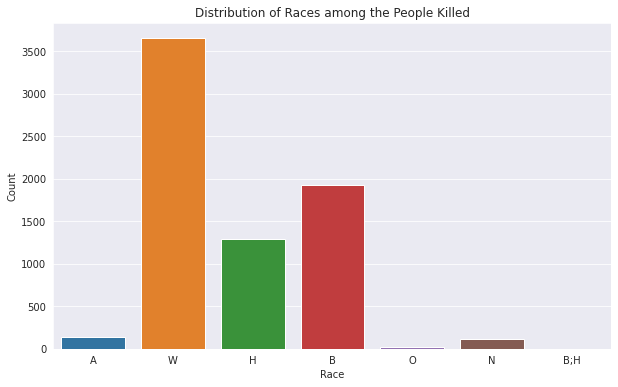

In [5]:
# Distribution of races among the people who were killed
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='race', data=merged_df)
plt.title('Distribution of Races among the People Killed')
plt.xlabel('Race')
plt.ylabel('Count');

The code above creates a histogram using Seaborn to show the distribution of ages among the people killed in police shootings. The merged_df dataset, which was created by merging the police shootings and population datasets, is used as the data source. The histogram is created using the sns.histplot() function, which takes in the data to plot and the number of bins to use for the histogram.

The resulting plot shows that the majority of people killed in police shootings were under the age of 50. The plot is centered around the age range of 20 to 40, with a peak at around 25 years old. The plot also shows a long tail on the right side, indicating that there were some individuals in their 70s and 80s who were killed in police shootings.

The mean age of the people killed in police shootings is also calculated and printed to the console using the .mean() method on the age column of the merged_df dataset. The mean age is approximately 37 years old, which aligns with the observations from the histogram that the majority of people killed were under the age of 50.

37.26535626535627


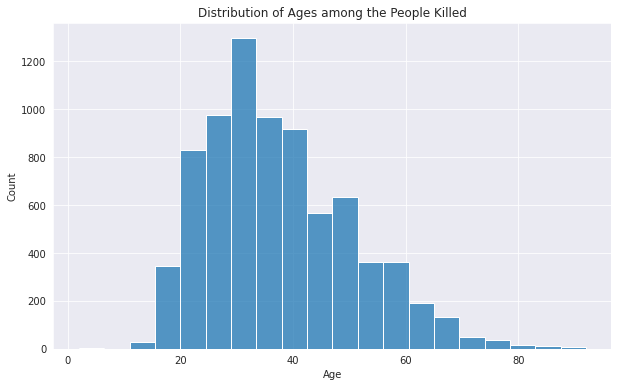

In [6]:
plt.figure(figsize=(10, 6))

sns.histplot(x='age', data=merged_df, bins=20)
plt.title('Distribution of Ages among the People Killed')
plt.xlabel('Age')
plt.ylabel('Count');

mean_age = merged_df["age"].mean()
print(mean_age)

The resulting plot provides a visual representation of the distribution of races among the people killed, broken down by state.

The graph shows the distribution of races among the incidents of police shootings in different US states. The X-axis represents the states, and the Y-axis represents the number of incidents. The bars are stacked, with each color representing a different racial category: black, white, Hispanic, Native American, Asian, and Other. The height of each colored section of the bar represents the number of incidents in that state involving individuals from that racial group.

The graph is helpful in providing an overview of the racial distribution of police shootings across different states. It shows that in some states, such as California, Florida and Texas, one particular race is involved in more incidents than others, while in other states, the distribution is more balanced. The graph can be used to identify states where there is a need for more targeted efforts to address police brutality against specific racial groups.






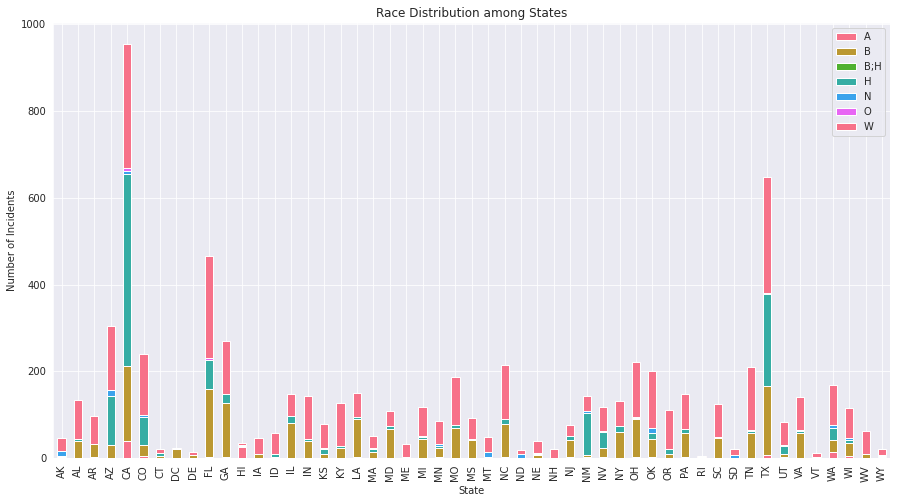

In [7]:
# group the data by state and race and count the number of occurrences
state_race_counts = merged_df.groupby(['state', 'race'])['id'].count().reset_index()

# pivot the data to create a wide format
state_race_counts_wide = state_race_counts.pivot(index='state', columns='race', values='id')

# create the stacked bar plot
sns.set_palette("husl")  # set the color palette
state_race_counts_wide.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Race Distribution among States')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.legend(loc='upper right')
plt.show()



This code block creates a bar plot to show the number of people killed by race in the top 5 cities with the most killings. The data is first grouped by city and race, then sorted by the total number of people killed in each city, and the top 5 cities are extracted. The resulting data is then used to create a bar plot, with each bar representing a city, the y-axis showing the number of people killed, and different colors used to distinguish between different races (white, black, Hispanic, Asian, and Native American). The title of the plot indicates that it shows the top 5 cities with the most killed people by race.

The data indicates that Black individuals are the most commonly killed race in Houston, while in Los Angeles, Hispanic individuals are the most commonly killed.

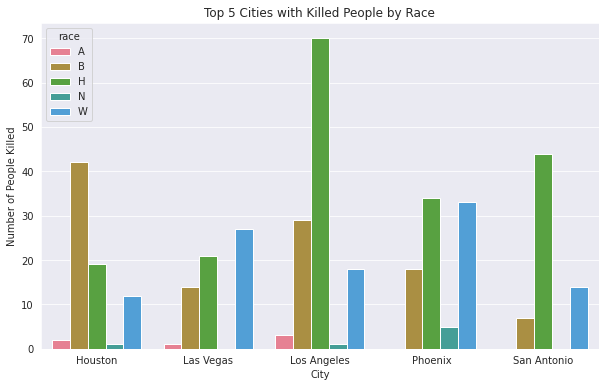

      Geographic area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29263              WY  Woods Landing-Jelm CDP        95.9           0   
29264              WY            Worland city        89.9         0.3   
29265              WY             Wright town        94.5         0.1   
29266              WY              Yoder town        97.4           0   
29267              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic  
0                         0           0            1.6  
1        

In [8]:
# Group the data by city and race
killings_by_city_race = merged_df.groupby(['city', 'race']).size().reset_index(name='count')

# Sort the data by the total count of killed people in each city
total_killed_by_city = killings_by_city_race.groupby('city').sum().reset_index()
sorted_total_killed_by_city = total_killed_by_city.sort_values('count', ascending=False)

# Extract the top 5 cities
top_5_cities = sorted_total_killed_by_city.head(5)['city']

# Filter the data to include only the top 5 cities
killings_top_5_cities = killings_by_city_race[killings_by_city_race['city'].isin(top_5_cities)]

# Create labels
labels = {'W': 'White', 'B': 'Black', 'H': 'Hispanic', 'A': 'Asian', 'N': 'Native American'}

# Set style
sns.set_stlye="ticks"

plt.figure(figsize=(10, 6))


# Create the bar plot
sns.barplot(data=killings_top_5_cities, x='city', y='count', hue='race')
plt.title('Top 5 Cities with Killed People by Race')
plt.ylabel('Number of People Killed')
plt.xlabel('City')
plt.show()

print(kaggle_share_race)

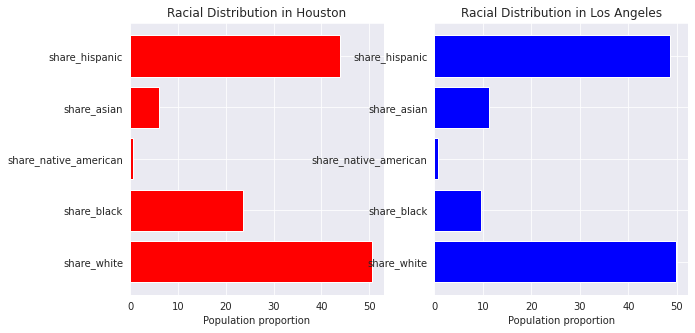

In [9]:
# Load the data for Houston and Los Angeles
houston_data = kaggle_share_race[(kaggle_share_race['City'] == 'Houston city') & (kaggle_share_race["Geographic area"] == "TX")]
los_angeles_data = kaggle_share_race[(kaggle_share_race['City'] == 'Los Angeles city') & (kaggle_share_race["Geographic area"] == "CA")]

# Extract the racial distribution information from the Houston data
houston_distribution = houston_data.drop(['Geographic area', 'City'], axis=1).astype(float).iloc[0]
los_angeles_distribution = los_angeles_data.drop(['Geographic area', 'City'], axis=1).astype(float).iloc[0]

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the horizontal bar chart for Houston data
axs[0].barh(houston_distribution.index, houston_distribution, color='red')
axs[0].set_xlabel('Population proportion')
axs[0].set_title('Racial Distribution in Houston')

# Plot the horizontal bar chart for Los Angeles data
axs[1].barh(los_angeles_distribution.index, los_angeles_distribution, color='blue')
axs[1].set_xlabel('Population proportion')
axs[1].set_title('Racial Distribution in Los Angeles')

# Show the plot
plt.show()

In [10]:
import folium

df_valid_loc = merged_df[merged_df['lat'].notnull() & merged_df['lng'].notnull()]

# Create a map centered on the United States
m = folium.Map(location=[39.833333, -98.585522], zoom_start=4)

# Add markers for each of the rows in merged_df
for index, row in df_valid_loc.iterrows():
    if row['race'] == 'B':
        folium.Marker([row['lat'], row['lng']], icon=folium.Icon(color='black')).add_to(m)
    elif row['race'] == 'W':
        folium.Marker([row['lat'], row['lng']], icon=folium.Icon(color='white')).add_to(m)
    else:
        folium.Marker([row['lat'], row['lng']]).add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

In [11]:
from folium import plugins
from folium.plugins import HeatMap

# create the map centered on the US
heat = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# add the heatmap layer with the latitudes and longitudes of police killings
heat_data = df_valid_loc[['lat', 'lng']].values.tolist()
HeatMap(heat_data).add_to(heat)

# display the map
heat


In [12]:
# Create a map centered on the US
map_heat = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add heatmaps for each race
for race in df_valid_loc['race'].unique():
    heat_data = df_valid_loc[df_valid_loc['race'] == race][['lat', 'lng']].values.tolist()
    heatmap = folium.plugins.HeatMap(heat_data, name=race)
    heatmap.add_to(map_heat)

# Add a layer control to toggle between the heatmaps
folium.LayerControl().add_to(map_heat)

# Display the map
map_heat